In [1]:
import spacy as sc, numpy as np, pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()

In [6]:
doc = nlp("As discussed above, the pulse signal is generated when both the clock signal and the delayed clock signal are at high states")
sentence_spans = list(doc.sents)

In [7]:
displacy.render(doc, style="dep", jupyter=True, options={'distance': 100})

In [16]:
import networkx as nx
G = nx.Graph()

In [17]:
def name(id):
    return id

G.clear()
for token in doc.to_json()['tokens']:
    G.add_node(name(token['id']))
for token in doc.to_json()['tokens']:
    color = 'blue'
    if token["dep"] == 'advcl' or token["dep"] == 'conj':
        color='red'
    G.add_edge(name(token['head']), name(token['id']), color=color)

In [18]:
edge_labels = {}
for token in doc.to_json()['tokens']:
    edge_labels[(name(token['head']), name(token['id']))] = f'{token["dep"]}'
    if token['id'] == token['head']:
            edge_labels[(name(token['id']), name(token['head']))] = ''

In [19]:
edge_labels

{(1, 0): 'mark',
 (8, 1): 'advcl',
 (1, 2): 'advmod',
 (8, 3): 'punct',
 (6, 4): 'det',
 (6, 5): 'compound',
 (8, 6): 'nsubjpass',
 (8, 7): 'auxpass',
 (8, 8): '',
 (19, 9): 'advmod',
 (13, 10): 'preconj',
 (13, 11): 'det',
 (13, 12): 'compound',
 (19, 13): 'nsubj',
 (13, 14): 'cc',
 (18, 15): 'det',
 (18, 16): 'amod',
 (18, 17): 'compound',
 (13, 18): 'conj',
 (8, 19): 'advcl',
 (19, 20): 'prep',
 (22, 21): 'amod',
 (20, 22): 'pobj'}

In [20]:
node_labels = {}
for token in doc.to_json()['tokens']:
    node_labels[name(token['id'])] = str(doc[token['id']])  # + '' + str(token['id'])

In [21]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [22]:
# G.remove_edge(2, 6)
# G.remove_edge(6, 10)

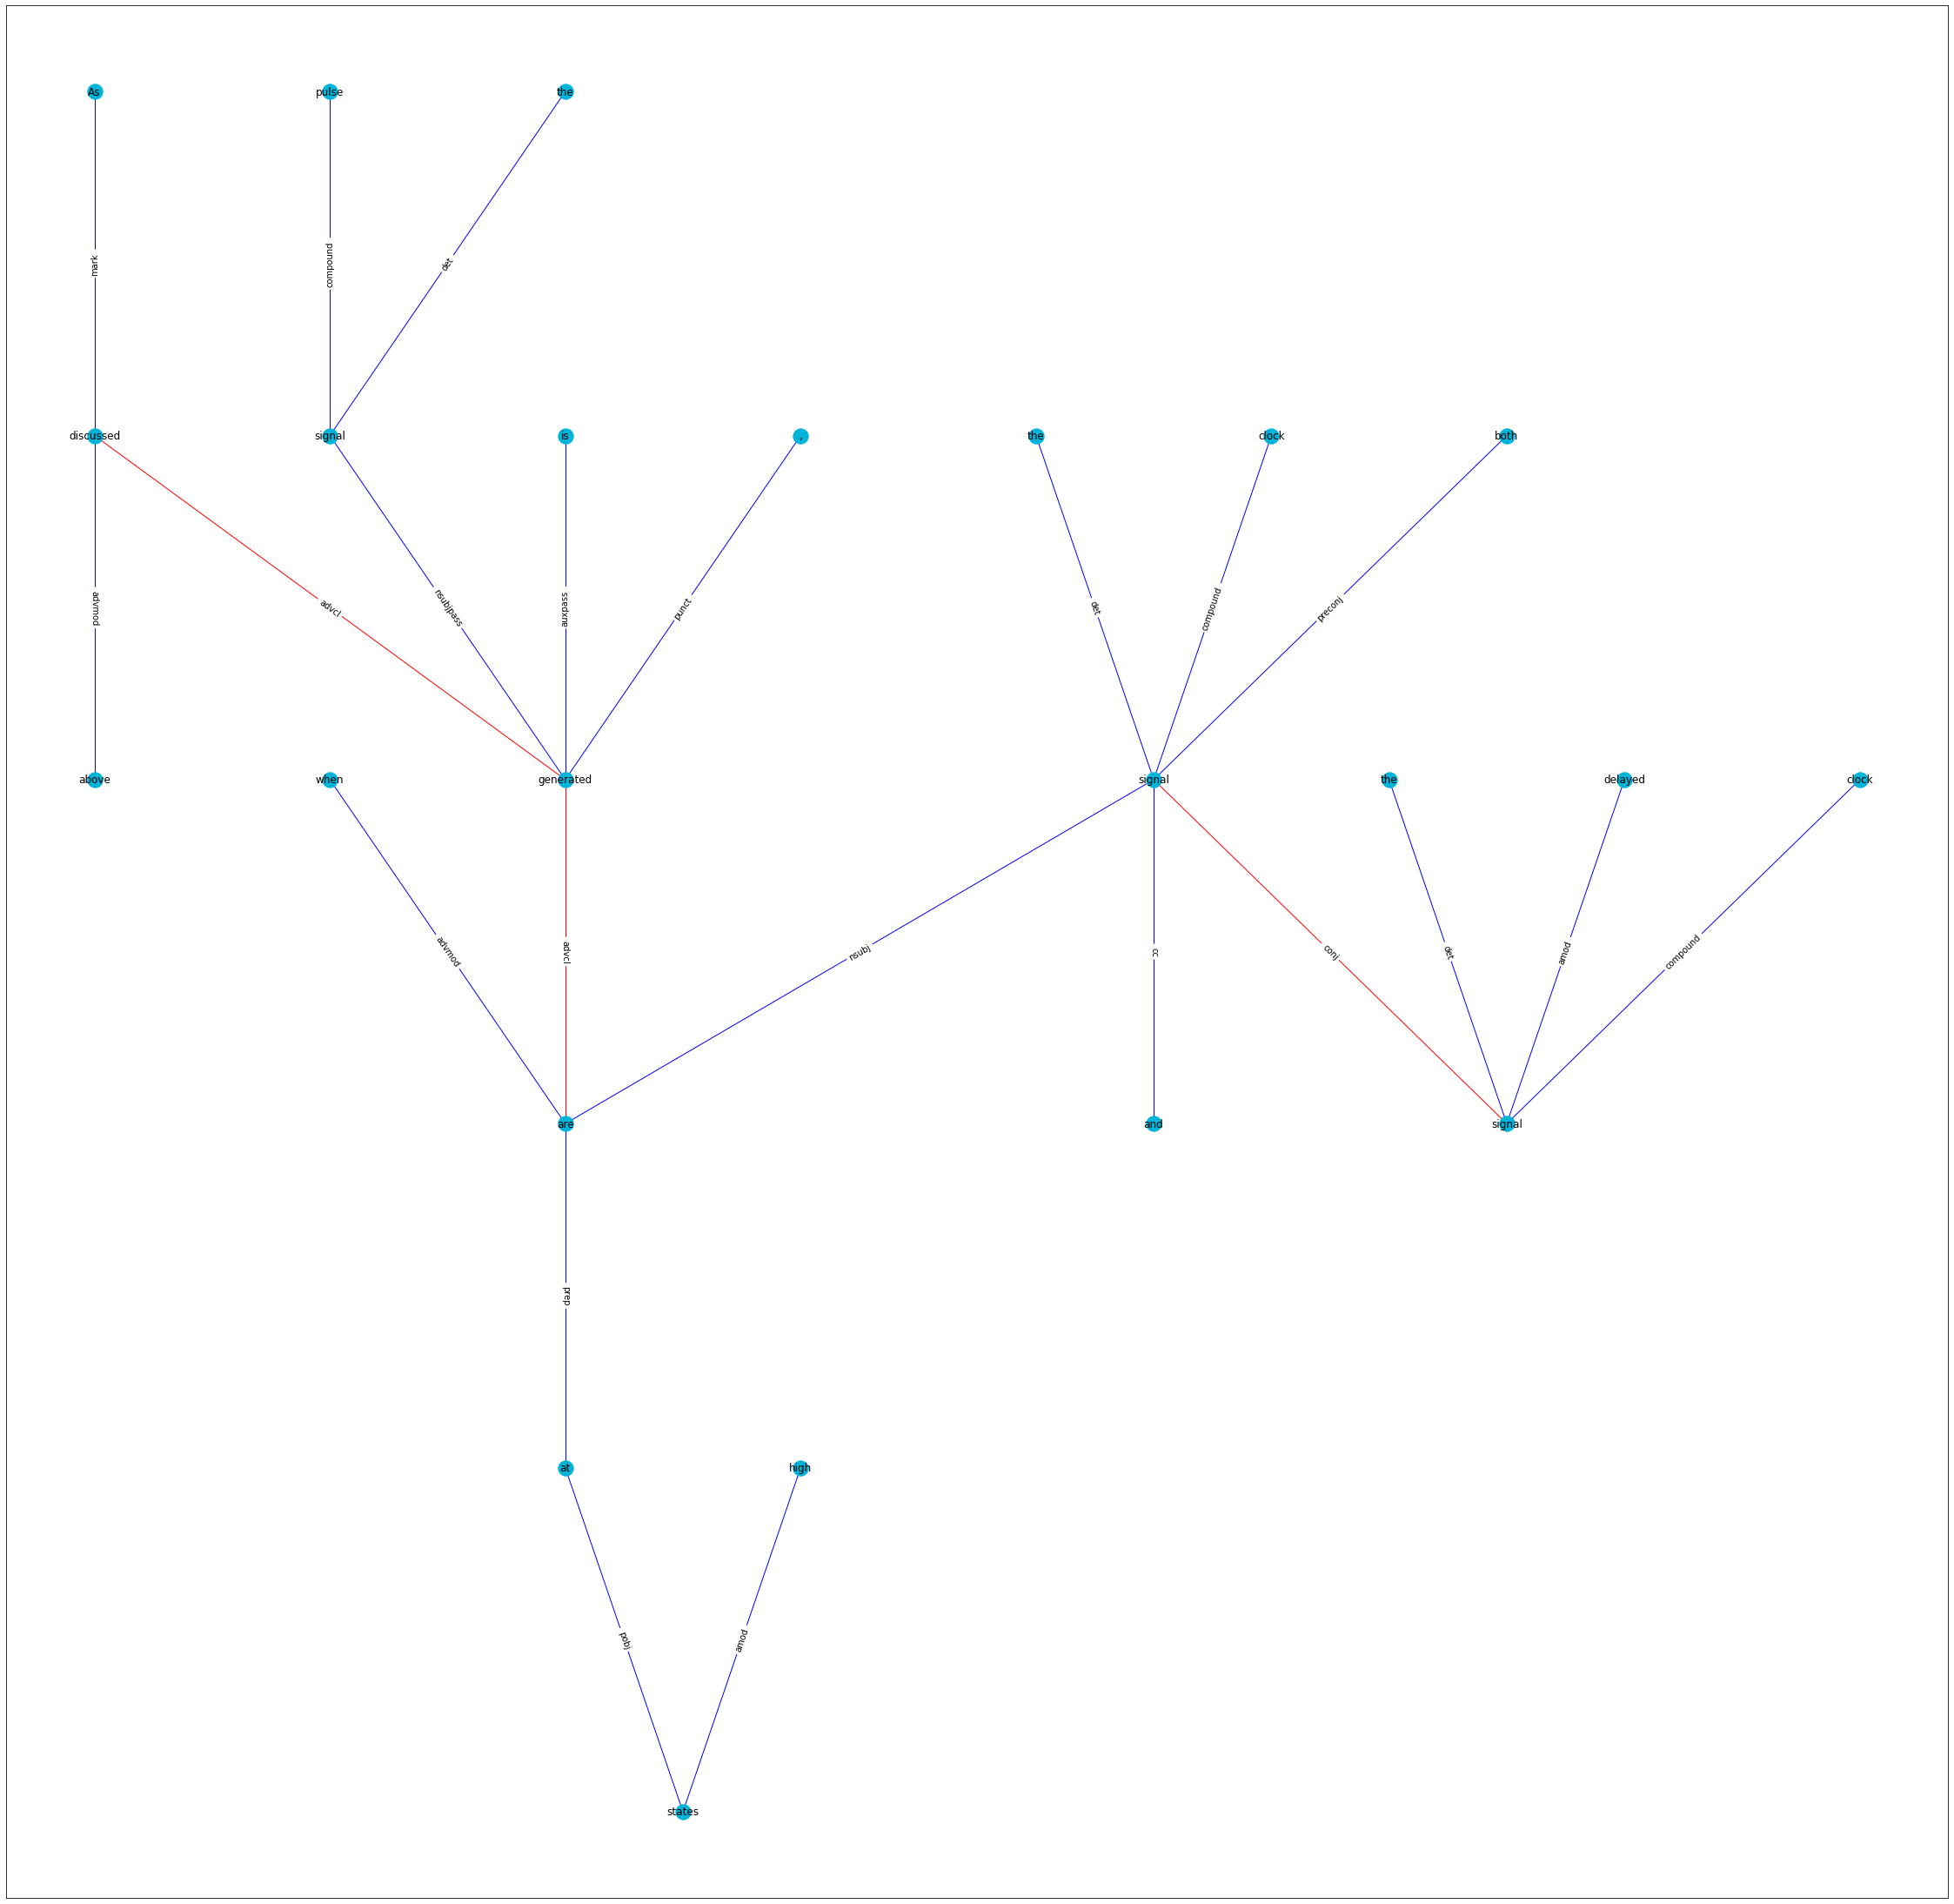

In [23]:
colors = [G[u][v]['color'] for u,v in G.edges()]

plt.figure(1, figsize=(40, 40)) 
pos = graphviz_layout(G, prog='dot')
# pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, labels=node_labels, edge_color=colors, node_color='#00b4d9')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# plt.text(-2, -0.5, str(query), ha='center', va='baseline', size=20, wrap=True)
plt.savefig('sent_g.png')
plt.show()


#nx.draw_random(G)  
# nx.draw_circular(G)  
# nx.draw_spectral(G)  
# nx.draw_spring(G)

In [419]:
for cc in nx.connected_components(G):
    print(cc)

{0, 1, 2, 3, 12}
{4, 5, 6}
{7, 8, 9, 10, 11}


In [359]:
sub_G = nx.Graph()

def create_subgraph(G,sub_G,start_node):
    for n in G.successors_iter(start_node):
        sub_G.add_path([start_node,n])
        create_subgraph(G,sub_G,n)
create_subgraph(G, sub_G, 8)
nx.draw_networkx(sub_G)

AttributeError: 'DiGraph' object has no attribute 'successors_iter'

In [ ]:
node_labels

In [ ]:
G.clear()

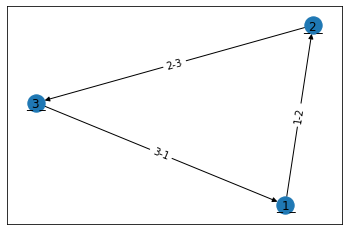

In [234]:
G = nx.DiGraph()

nodes = [(1, {"label": "_1_"}), (2, {"label": "_2_"}), (3, {"label": "_3_"})]
edges = [
    (1, 2, {"label": "1-2"}), 
    (2, 3, {"label": "2-3"}), 
    (3, 1, {"label": "3-1"})
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)
edge_labels = nx.get_edge_attributes(G,'label')
node_labels = nx.get_node_attributes(G,'label')

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [281]:
!pip install pygraphviz

     |████████████████████████████████| 118 kB 2.0 MB/s eta 0:00:01
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp38-cp38-macosx_10_9_x86_64.whl size=101505 sha256=be80f5bd2c604101c8c3bd3fd06e86ee40c34fda9496e71329e010c4ce1536ee
  Stored in directory: /Users/markporosin/Library/Caches/pip/wheels/77/c6/8b/566e1c26d0f9d41093e28d8e1768f1412d54846e3296114feb
Successfully built pygraphviz


In [46]:
{1, 2, 3}.union({4, 5})

{1, 2, 3, 4, 5}

In [28]:
sent_df = pd.read_csv('../res/main_sent_texts_0_20.csv', index_col=0)
# sent_df.__delitem__('patterns')
# send_df.__delitem__('patterns_num')
# send_df.__delitem__('chunks_nltk')
# sent_df.__delitem__('prepared_sent')
sent_df.head(100)

,text,main_sent
0,0,"['present invention relates to integrated circuit IC designs', 'output of NAND gate device is inverted to generate pulse signal', 'construction of operation of invention with additional objectives will be understood from following description of specific embodiments', 'read in connection with accompanying drawings', 'This in turn may cause pulse generator 100 to fail', 'it suffers from signal fighting issues', 'first input terminal of latch module 304 is coupled to output of inverter 308', 'its second input terminal is tied to output node 318 of pulse generator 300', 'At time t2 leading edge of signal C triggers latch module 320 to store 0 causing signal B to go', 'Specific embodiments of components are described to help clarify invention']"
1,1,"['In order to make significant measurements of data quality of service over wireless network it is necessary to make multiple measurements from multiple remote devices', 'In 1997 three competing handset vendors Nokia joined forces', 'objective of invention is to perform measurements during variety of different types of communications such as circuit switched calls', 'packet data calls SMS messages', 'wireless internet transactions including ecommerce', 'further objective of invention is to collect variety of different types of measurements such as latency measurements e.g.', 'objective of invention is to use control links that are wired', 'they provide significant measurements', 'object of invention is to provide back end which allows user access through Internet allows for post - processing of received data', 'allows for scheduling collection missions based on available resources']"
2,2,"['cooling means is designed as Joule Thomson valve with downstream heat exchanger', 'It is underlying purpose of invention to present superconducting magnet system which minimizes helium consumption omitting unnecessary interruption of measurements due to frequent refilling of helium', 'object is achieved in accordance with invention by providing refrigerator whose cold end projects into second helium tank by returning supplied helium in closed loop via refrigerator into second helium tank during normal operation which is pre - cooled', 'invention realizes low vapour superconducting magnet system', 'is returned to second tank within closed system avoiding unnecessary helium loss', 'In preferred embodiment of invention closed helium loop comprises return line', 'return line having pressure compensation container outside of cryostat', 'features mentioned may be used in accordance with invention in arbitrary combination', 'embodiments shown are not to be understood as exhaustive enumeration', 'To generate lower temperatures required to liquefy helium']"
3,3,"['characterized by comprising 0.1 to 30 % by weight of following functional agent', 'yarns are applied with aqueous solution in amount of 0.1 to 3 weight %', 'calculated on basis of said agent', 'specification which follow', 'polyether polyester compound having average molecular weight of 3,000 to 50,000 which is obtained by polycondensation of components D 3 polyether polyester compound having average molecular weight of 3,000 to 50,000 which is obtained by polycondensation of components D', '4 polyolefin wax having average molecular weight of 1,000 to 10,000', 'As surfactant used with agent for treating biodegradable synthetic yarns according to present invention nonionic surfactants may be used', 'it is preferable to use nonionic surfactants in admixture', 'It is noted present invention can be applied to biodegradable synthetic yarns that are subjected to false twisting', '% is given % by weight']"
4,4,"['present invention relates to signal determining apparatus for receiving', 'Description of Related Art in signal determining apparatus amplifier circuit is provided to receive', 'comparator is provided', 'It is object of present invention to provide signal determining apparatus including amplifier circuit operable at high res

In [101]:
sample = np.array([
    [1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.],
])

cm = np.array([2, 3, 4, 5])

dist = np.linalg.norm(sample - cm, axis=1)

In [103]:
np.argmin(dist)

1